<a href="https://colab.research.google.com/github/ddas2707/lmt_ads_codes/blob/main/timeSeriesArima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('exp7ads.csv', parse_dates=['Month'], index_col='Month')

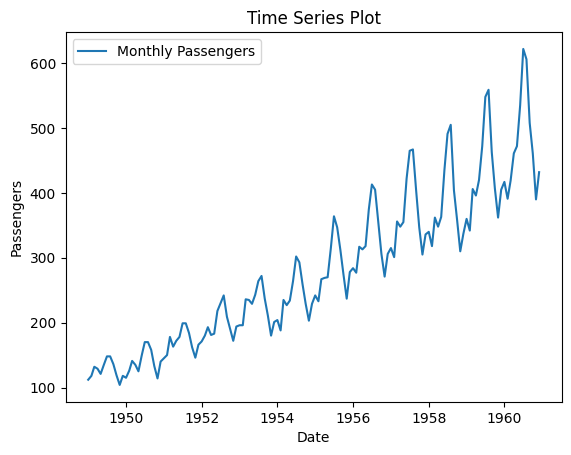

In [ ]:
# 1. Normal time series plot
plt.plot(df['Passengers'], label='Monthly Passengers')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

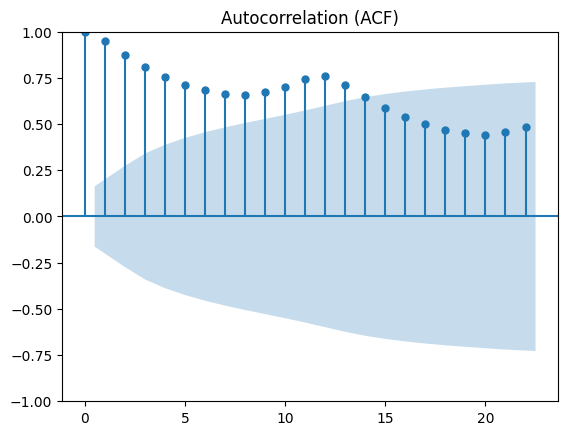

In [ ]:
# 2. ACF and PACF plots
plot_acf(df['Passengers'])
plt.title('Autocorrelation (ACF)')
plt.show()

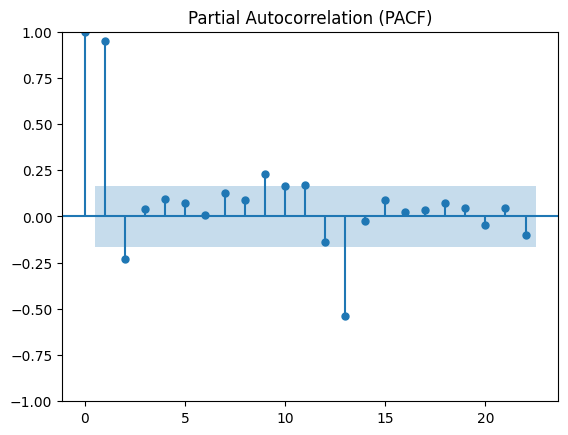

In [ ]:
plot_pacf(df['Passengers'])
plt.title('Partial Autocorrelation (PACF)')
plt.show()

In [ ]:
model = ARIMA(df['Passengers'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(steps=12)
future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

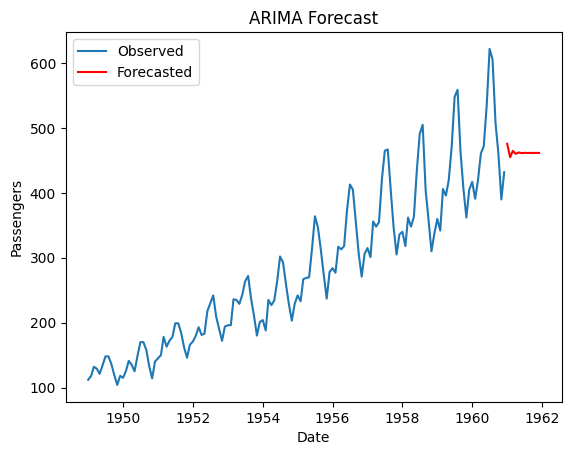

In [ ]:
plt.plot(df['Passengers'], label='Observed')
plt.plot(future_dates, forecast, label='Forecasted', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
# 4. Print forecast
print("Next 12 months forecast:")
print(forecast)

Next 12 months forecast:
1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
Freq: MS, Name: predicted_mean, dtype: float64
